Enter the number of students:  2

Enter student name:  ANU
Enter number of exams completed by ANU:  2
Enter 2 marks for ANU, separated by spaces:  12 13

Enter student name:  LA
Enter number of exams completed by LA:  2
Enter 2 marks for LA, separated by spaces:  50 60



Predicted marks for ANU:
  Exam 3: 14.00
  Exam 4: 15.00

Predicted marks for LA:
  Exam 3: 70.00
  Exam 4: 80.00


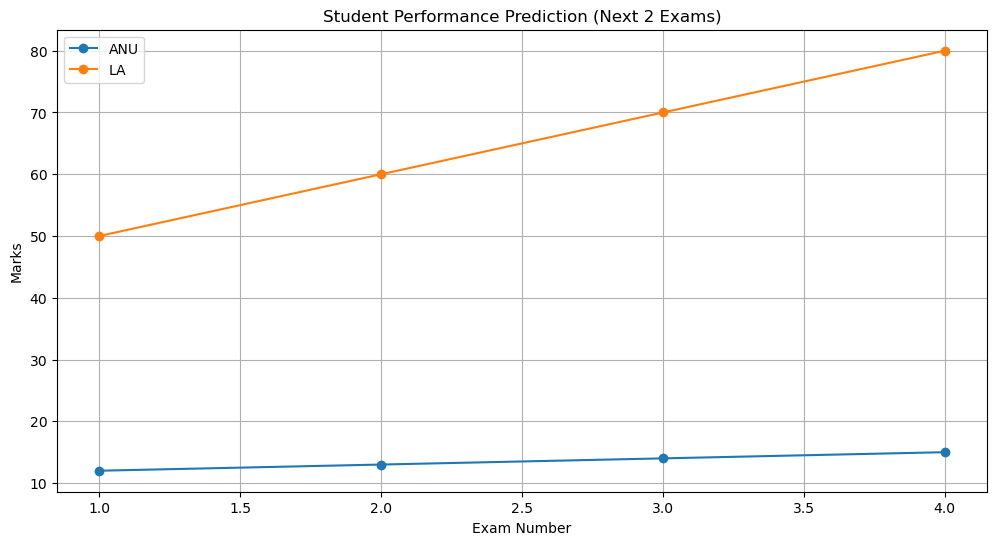

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Get number of students
num_students = int(input("Enter the number of students: "))
students_data = {}
exam_counts = {}

# Get marks for each student
for _ in range(num_students):
    name = input("\nEnter student name: ")
    num_exams = int(input(f"Enter number of exams completed by {name}: "))
    
    marks_input = input(f"Enter {num_exams} marks for {name}, separated by spaces: ")
    marks = list(map(float, marks_input.strip().split()))
    
    if len(marks) != num_exams:
        print("Error: Number of marks entered does not match the number of exams.")
        exit()
    
    students_data[name] = marks
    exam_counts[name] = num_exams

# Plot setup
plt.figure(figsize=(12, 6))
plt.title("Student Performance Prediction (Next 2 Exams)")
plt.xlabel("Exam Number")
plt.ylabel("Marks")

# Predict and plot for each student
for name, marks in students_data.items():
    num_exams = exam_counts[name]
    X = np.array(range(1, num_exams + 1)).reshape(-1, 1)
    y = np.array(marks)
    
    model = LinearRegression()
    model.fit(X, y)
    
    future_exams = np.array([num_exams + 1, num_exams + 2]).reshape(-1, 1)
    predicted = model.predict(future_exams)
    
    all_exams = np.append(X, future_exams).reshape(-1, 1)
    all_scores = np.append(y, predicted)
    
    # Plotting line
    plt.plot(all_exams, all_scores, marker='o', label=name)
    
    # Print predictions
    print(f"\nPredicted marks for {name}:")
    print(f"  Exam {num_exams + 1}: {predicted[0]:.2f}")
    print(f"  Exam {num_exams + 2}: {predicted[1]:.2f}")

plt.legend()
plt.grid(True)
plt.show()
